# Learning Curves

Learning curves can be a great tool to diagnose a machine learning model. They will tell you wether the patterns a model learns during training generalize and also apply on the test set. Generalizing is an important property of a model, we want models to work well on unseen data, not only on the training data.

I'll show how to plot and interpret learning curves on an artificial dataset, the same as we used to demonstrate overfitting and underfitting.

In [17]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=50, noise=0.2, factor=0.3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [18]:
from mlxtend.plotting import plot_decision_regions, plot_learning_curves, category_scatter

%matplotlib inline

In [23]:
#category_scatter(X, y)

## Underfitted situation

Underfitting means our model is to "simple", the patters it learns are not a good (enough) description of the data. We'll apply logistic regression to a the dataset with concentric circles. Let's plot the decision boundary and the learning curve.

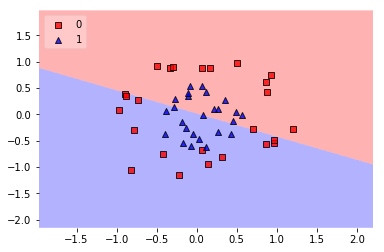

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

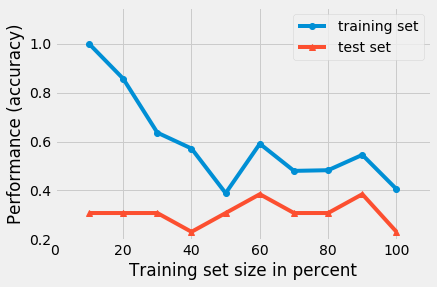

In [20]:
_ = plot_learning_curves(X_train, y_train, X_test, y_test, LogisticRegression(), scoring='accuracy', print_model=False)

What you see in the learning curve is that the model fits neither the training nor the test data well. Accuracy is always low here, hovering around the 50% area. This is a typical pattern in the learning curve for underfitting, the errors on both the training and test data are high.

So for this dataset, we need to use a different model to get good results.

## Good fitting situation

If a model does manage to fit the data well and learns suitable patterns, we expect the learning curves to converge and show good performance on both the training and the test data.

For this dataset we can achieve that with a SVM classifier.

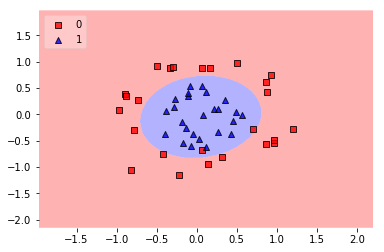

In [21]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X, y)
_ = plot_decision_regions(X, y, clf, legend=2)

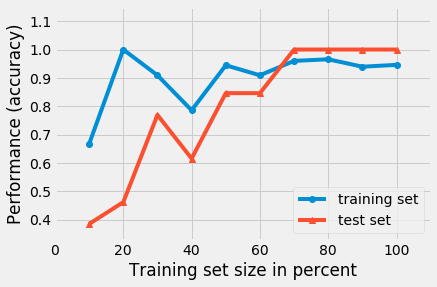

In [22]:
_ = plot_learning_curves(X_train, y_train, X_test, y_test, SVC(), scoring='accuracy', print_model=False)

## Overfitting situation

In an overfitting situation, the model learns patterns that apply very well to the training data, but only there. So the model doesn't generalize well. It has become to specific for the training data. These can be many reasons for this, but large complex models and/or little training data can contribute for example.

What you will see in a learning curve plot here, is a low error (high accuracy) for the training data. And high error (low accuracy) on the test data.